In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy
from scipy.interpolate import interp1d

from dynesty_orbits_3D_Sergey import prior_transform, model

import gala.potential as gp
import gala.dynamics as gd
from gala.dynamics import mockstream as ms
from gala.units import galactic

import astropy.units as u

In [131]:
def get_rot_mat(x1, x2, x3):
    V = np.array([np.cos(2*np.pi*x2)*np.sqrt(x3), 
                  np.sin(2*np.pi*x2)*np.sqrt(x3), 
                  np.sqrt(1-x3)])
    
    I = np.identity(3)

    H = I - 2 * V[:, None] @ V[None]

    R = np.array([[ np.cos(2*np.pi*x1), np.sin(2*np.pi*x1), 0],
                  [-np.sin(2*np.pi*x1), np.cos(2*np.pi*x1), 0],
                  [0,0,1]])

    M = -H @ R

    return M

Text(0, 0.5, 'z')

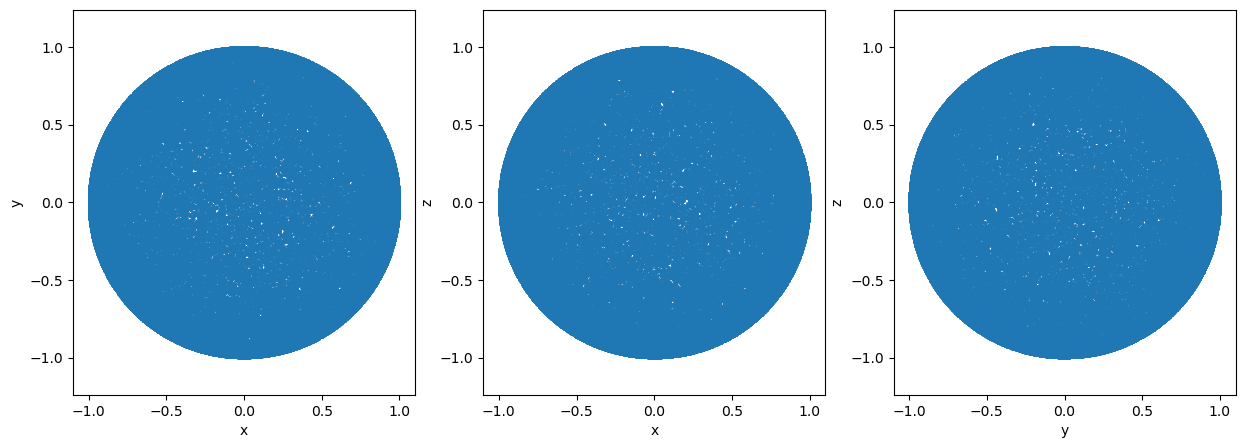

In [142]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(new_rot_z[:,0,0], new_rot_z[:,0,1], s=1)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,3,2)
plt.scatter(new_rot_z[:,0,0], new_rot_z[:,0,2], s=1)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.subplot(1,3,3)
plt.scatter(new_rot_z[:,0,1], new_rot_z[:,0,2], s=1)
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('z')

In [146]:
z = np.array([0, 0, 1])
rot_z = []
for i in range(100000):
    x1, x2, x3 = np.random.uniform(0, 1, 3)
    x1 = 0
    M = get_rot_mat(x1, x2, x3)
    rot_z.append(M@z[:,None])
rot_z = np.array(rot_z)


In [147]:
z.shape

(3,)

Text(0, 0.5, 'z')

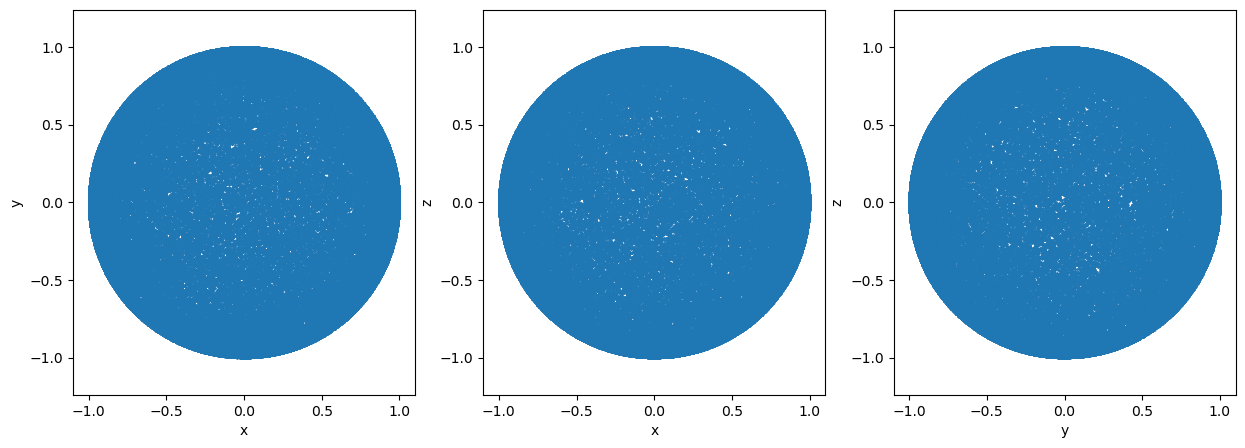

In [148]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(rot_z[:,0], rot_z[:,1], s=1)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.subplot(1,3,2)
plt.scatter(rot_z[:,0], rot_z[:,2], s=1)
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('z')
plt.subplot(1,3,3)
plt.scatter(rot_z[:,1], rot_z[:,2], s=1)
plt.axis('equal')
plt.xlabel('y')
plt.ylabel('z')

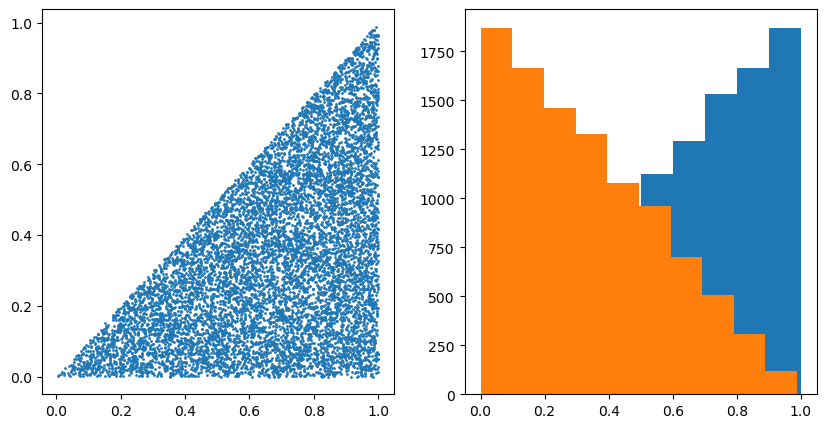

In [189]:
a,b = np.random.uniform(0, 1, (2, 10000))

c = 1 - np.sqrt(a)*b
d = 1 - np.sqrt(a)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(c, d, s=1)
plt.subplot(1,2,2)
plt.hist(c)
plt.hist(d);


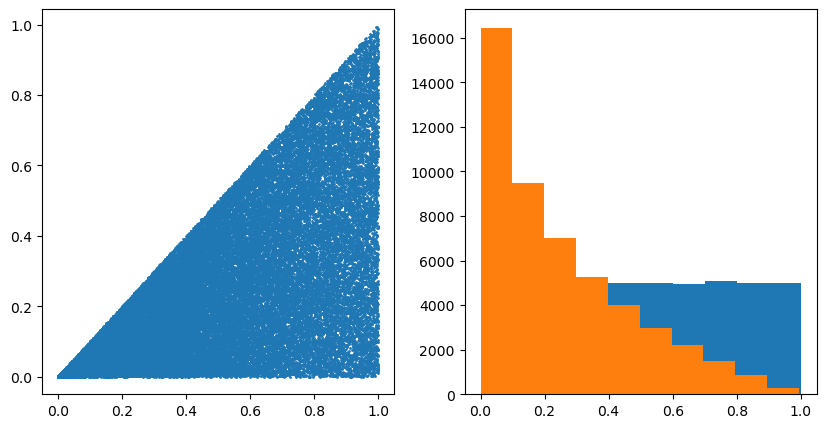

In [181]:
a,b = np.random.uniform(0, 1, (2, 50000))
c, d = a, a*b

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.scatter(c, d, s=1)
plt.subplot(1,2,2)
plt.hist(c)
plt.hist(d);


In [170]:
b, a = 0.2, 0.8
c = (a+b+abs(a-b))/2
d = (a+b-abs(a-b))/2
print(c, d)

0.8 0.19999999999999996


In [4]:
logM = 12
Rs   = 10
q1, q2, q3   = 1, 1, 1 #0.5, 1., 1.5
x0, y0, z0 = -60, 0, 0
vx0, vy0, vz0 = 0, 125, 0
time = 3

logm = 8

In [5]:
pot_NFW = gp.NFWPotential(10**logM, Rs, a=q1, b=q2, c=q3, units=galactic, origin=None, R=None)
H = gp.Hamiltonian(pot_NFW)

w0 = gd.PhaseSpacePosition(pos=[x0, y0, z0]*u.kpc,
                           vel=[vx0, vy0, vz0]*u.km/u.s)

df = ms.FardalStreamDF(gala_modified=True)
gen = ms.MockStreamGenerator(df, H)

dt = 1 * u.Myr
stream, prog = gen.run(w0, (10**logm)*u.Msun, dt=dt, n_steps=(time*u.Gyr/dt).decompose().value)

In [6]:
x,y, _ = stream.xyz
xp, yp, _ = prog.xyz

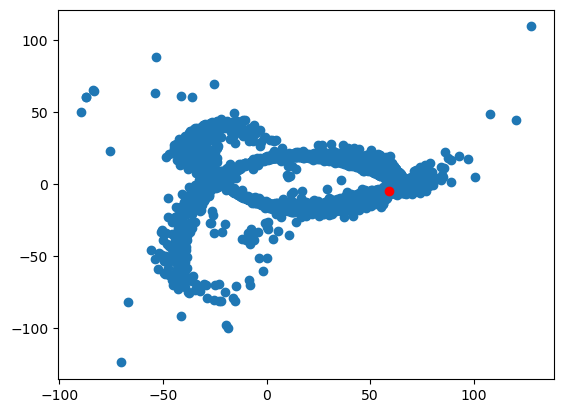

In [7]:
plt.scatter(x,y)
plt.scatter(xp, yp, color='red')